### Exercise 5

<div class="alert-success">
    
1. **Get a polygons map of the lowest administrative unit possible. : distrito**
    
2. Get a **table of variables for those units**. At least 3 numerical variables. densidad poblacion, indice de contaminacion  indice de probreza, etc**
    poblacion y superficie no considerar para las 3 varibles cuanti

3. **Preprocess both tables and get them ready for merging.**

4. **Do the merging, making the changes needed so that you keep the most columns.**
    el ejercicio ess juntar la data con la tabla de datos, no hay ningun calculo
    
    
</div>

In [149]:
from  fiona import listlayers
import os

argentinaMaps=os.path.join('maps','argentina22171','argentinaMaps22171_all3.gpkg')

#layers in maps
listlayers(argentinaMaps)

['country',
 'cities',
 'rivers',
 'states',
 'municipalities',
 'border',
 'airports']

In [150]:
# reading in the data:
import os
import geopandas as gpd

country=gpd.read_file(argentinaMaps,layer='country')
states=gpd.read_file(argentinaMaps,layer='states')
municipalities=gpd.read_file(argentinaMaps,layer='municipalities')


In [151]:
# data table
import pandas as pd

argData=os.path.join('data','base_datos_3_varl.xlsx')
base_datos=pd.read_excel(argData,
                     dtype={'Ubigeo': object})
base_datos.info()
#hasta ahora solo hemos trabajado con su geometria no con su data
#tengo q hacer un merge: o sea meter la data dentro del poligono

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Provincia              23 non-null     object
 1   IDH_2019               23 non-null     object
 2   muertes_Tuberculosis   23 non-null     int64 
 3   Pobreza_personas(%)    23 non-null     object
 4   Año                    23 non-null     int64 
 5   Pais                   23 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.2+ KB


In [152]:
base_datos.head()

,Provincia,IDH_2019,muertes_Tuberculosis,Pobreza_personas(%),Año,Pais
0,Ciudad Autónoma de Buenos Aires,"0,882",28,"1,3",2019,Argentina
1,Buenos Aires,"0,842",209,"11,3",2019,Argentina
2,Córdoba,"0,858",19,"7,9",2019,Argentina
3,Entre Ríos,"0,836",5,"3,4",2019,Argentina
4,Santa Fe,"0,841",25,"3,5",2019,Argentina


In [182]:
base_datos.rename(columns={'Pobreza_personas(%)':'Pobreza_porcentaje'},inplace=True)
base_datos.head()

,Provincia,IDH_2019,muertes_Tuberculosis,Pobreza_porcentaje,Año,Pais
0,CIUDAD AUTONOMA DE BUENOS AIRES,"0,882",28,"1,3",2019,Argentina
1,BUENOS AIRES,"0,842",209,"11,3",2019,Argentina
2,CORDOBA,"0,858",19,"7,9",2019,Argentina
3,ENTRE RIOS,"0,836",5,"3,4",2019,Argentina
4,SANTA FE,"0,841",25,"3,5",2019,Argentina


In [183]:
# map
#import geopandas as gpd

#peruDataDist=os.path.join('miningGDF',"maps","DistritosMap.zip")

#datadismap=gpd.read_file(peruDataDist)

states.head()

,Pais,ADM0_PCODE,Provincia,ADM1_PCODE,geometry
0,Argentina,AR,Buenos Aires,AR006,MULTIPOLYGON Z (((2335919.444 5475450.748 0.00...
1,Argentina,AR,Catamarca,AR010,"POLYGON Z ((1906189.076 7204695.456 0.000, 191..."
2,Argentina,AR,Chaco,AR022,"POLYGON Z ((2494292.791 7296258.081 0.000, 249..."
3,Argentina,AR,Chubut,AR026,MULTIPOLYGON Z (((1916196.919 4975824.860 0.00...
4,Argentina,AR,Ciudad de Buenos Aires,AR002,"POLYGON Z ((2747577.276 6094399.410 0.000, 274..."


In [184]:
#rename
states.rename(columns={'ADM1_ES':'Provincia', 'ADM0_ES':'Pais'},inplace=True)
states.head()

,Pais,ADM0_PCODE,Provincia,ADM1_PCODE,geometry
0,Argentina,AR,Buenos Aires,AR006,MULTIPOLYGON Z (((2335919.444 5475450.748 0.00...
1,Argentina,AR,Catamarca,AR010,"POLYGON Z ((1906189.076 7204695.456 0.000, 191..."
2,Argentina,AR,Chaco,AR022,"POLYGON Z ((2494292.791 7296258.081 0.000, 249..."
3,Argentina,AR,Chubut,AR026,MULTIPOLYGON Z (((1916196.919 4975824.860 0.00...
4,Argentina,AR,Ciudad de Buenos Aires,AR002,"POLYGON Z ((2747577.276 6094399.410 0.000, 274..."


In [185]:
provinciasGDF = states.loc[:,['Provincia','geometry', 'Pais']]
provinciasGDF

,Provincia,geometry,Pais
0,Buenos Aires,MULTIPOLYGON Z (((2335919.444 5475450.748 0.00...,Argentina
1,Catamarca,"POLYGON Z ((1906189.076 7204695.456 0.000, 191...",Argentina
2,Chaco,"POLYGON Z ((2494292.791 7296258.081 0.000, 249...",Argentina
3,Chubut,MULTIPOLYGON Z (((1916196.919 4975824.860 0.00...,Argentina
4,Ciudad de Buenos Aires,"POLYGON Z ((2747577.276 6094399.410 0.000, 274...",Argentina
5,Córdoba,"POLYGON Z ((2288373.932 6695803.079 0.000, 228...",Argentina
6,Corrientes,MULTIPOLYGON Z (((3004612.053 6855238.635 0.00...,Argentina
7,Entre Ríos,"POLYGON Z ((2798505.825 6586816.825 0.000, 279...",Argentina
8,Formosa,"POLYGON Z ((2497424.367 7484757.793 0.000, 249...",Argentina
9,Jujuy,"POLYGON Z ((2098377.586 7581146.835 0.000, 210...",Argentina


In [186]:
# all capitals, no empty spaces before or after.

capitalizeColumns=lambda x: x.str.upper().str.strip()
base_datos[['Provincia']]=base_datos[['Provincia']].apply(capitalizeColumns)
provinciasGDF[['Provincia']]=provinciasGDF[['Provincia']].apply(capitalizeColumns)

In [169]:
!pip install unidecode

Defaulting to user installation because normal site-packages is not writeable


In [187]:
import unidecode


byePunctuation=lambda x: unidecode.unidecode(x)
base_datos[['Provincia']]=base_datos[['Provincia']].applymap(byePunctuation)  #applymap for olderpandas para colab
provinciasGDF[['Provincia']]=provinciasGDF[['Provincia']].applymap(byePunctuation) #applymap for olderpandas

In [188]:
#encontrenmos los que nos coinciden
nomatch_df=set(base_datos.Provincia)- set(provinciasGDF.Provincia)
nomatch_gdf=set(provinciasGDF.Provincia)-set(base_datos.Provincia) 

In [189]:
len(nomatch_df), len(nomatch_gdf)

(1, 2)

In [190]:
# pick the closest match from nomatch_gdf for a value in nomatch_df
from thefuzz import process
[(dis,process.extractOne(dis,nomatch_gdf)) for dis in sorted(nomatch_df)]
#noto que no hay nada q ambiar a mano entonces creo mi diccionario

[('CIUDAD AUTONOMA DE BUENOS AIRES', ('CIUDAD DE BUENOS AIRES', 95))]

In [191]:
{dis:process.extractOne(dis,nomatch_gdf)[0] for dis in sorted(nomatch_df)}

{'CIUDAD AUTONOMA DE BUENOS AIRES': 'CIUDAD DE BUENOS AIRES'}

In [204]:
# then:
changesDis_df={dis:process.extractOne(dis,nomatch_gdf)[0] for dis in sorted(nomatch_df)}
changesDis_df

{'CIUDAD AUTONOMA DE BUENOS AIRES': 'CIUDAD DE BUENOS AIRES'}

In [205]:
datadis.Provincia.replace(changesDis_df,inplace=True)

In [206]:
provinciasGDF2=provinciasGDF.merge(base_datos, on='Provincia')
# check
provinciasGDF2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Provincia              22 non-null     object  
 1   geometry               22 non-null     geometry
 2   Pais_x                 22 non-null     object  
 3   IDH_2019               22 non-null     object  
 4   muertes_Tuberculosis   22 non-null     int64   
 5   Pobreza_porcentaje     22 non-null     object  
 6   Año                    22 non-null     int64   
 7   Pais_y                 22 non-null     object  
dtypes: geometry(1), int64(2), object(5)
memory usage: 1.5+ KB


In [207]:
bye=['Año','Pais_y']
provinciasGDF2.drop(columns=bye,inplace=True)
provinciasGDF2.rename(columns={'Pais_x':'Pais'},inplace=True)
# keeping
provinciasGDF2.head()

,Provincia,geometry,Pais,IDH_2019,muertes_Tuberculosis,Pobreza_porcentaje
0,BUENOS AIRES,MULTIPOLYGON Z (((2335919.444 5475450.748 0.00...,Argentina,"0,842",209,"11,3"
1,CATAMARCA,"POLYGON Z ((1906189.076 7204695.456 0.000, 191...",Argentina,"0,844",2,"6,8"
2,CHACO,"POLYGON Z ((2494292.791 7296258.081 0.000, 249...",Argentina,"0,808",7,"4,4"
3,CHUBUT,MULTIPOLYGON Z (((1916196.919 4975824.860 0.00...,Argentina,"0,858",9,"7,6"
4,CORDOBA,"POLYGON Z ((2288373.932 6695803.079 0.000, 228...",Argentina,"0,858",19,"7,9"


In [166]:
#provinciasGDF2= gpd.GeoDataFrame(provinciasGDF2, crs = 4326)
#provinciasGDF21= provinciasGDF2.to_crs(22171)
#type(provinciasGDF2)

In [102]:
#tablaMergeadas=states.merge(datadis, left_on='Provincia', right_on='Provincia')
#tablaMergeadas

,Pais_x,ADM0_PCODE,Provincia,ADM1_PCODE,geometry,IDH_2019,muertes_Tuberculosis,Pobreza_personas(%),Año,Pais_y
0,Argentina,AR,Buenos Aires,AR006,MULTIPOLYGON Z (((2335919.444 5475450.748 0.00...,"0,842",209,"11,3",2019,Argentina
1,Argentina,AR,Catamarca,AR010,"POLYGON Z ((1906189.076 7204695.456 0.000, 191...","0,844",2,"6,8",2019,Argentina
2,Argentina,AR,Chaco,AR022,"POLYGON Z ((2494292.791 7296258.081 0.000, 249...","0,808",7,"4,4",2019,Argentina
3,Argentina,AR,Chubut,AR026,MULTIPOLYGON Z (((1916196.919 4975824.860 0.00...,"0,858",9,"7,6",2019,Argentina
4,Argentina,AR,Corrientes,AR018,MULTIPOLYGON Z (((3004612.053 6855238.635 0.00...,"0,839",10,"6,6",2019,Argentina
5,Argentina,AR,Formosa,AR034,"POLYGON Z ((2497424.367 7484757.793 0.000, 249...","0,822",4,"11,0",2019,Argentina
6,Argentina,AR,Jujuy,AR038,"POLYGON Z ((2098377.586 7581146.835 0.000, 210...","0,840",10,"5,7",2019,Argentina
7,Argentina,AR,La Rioja,AR046,"POLYGON Z ((1842905.218 6918621.830 0.000, 184...","0,840",4,"6,8",2019,Argentina
8,Argentina,AR,Mendoza,AR050,"POLYGON Z ((1771643.879 6456186.096 0.000, 177...","0,848",8,"5,8",2019,Argentina
9,Argentina,AR,Misiones,AR054,MULTIPOLYGON Z (((3095005.586 6872963.019 0.00...,"0,842",14,"5,7",2019,Argentina


In [103]:
#tablaMergeadas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Pais_x                 16 non-null     object  
 1   ADM0_PCODE             16 non-null     object  
 2   Provincia              16 non-null     object  
 3   ADM1_PCODE             16 non-null     object  
 4   geometry               16 non-null     geometry
 5   IDH_2019               16 non-null     object  
 6   muertes_Tuberculosis   16 non-null     int64   
 7   Pobreza_personas(%)    16 non-null     object  
 8   Año                    16 non-null     int64   
 9   Pais_y                 16 non-null     object  
dtypes: geometry(1), int64(2), object(7)
memory usage: 1.4+ KB


In [70]:
#states.merge(datadis, left_on='Provincia', right_on='Provincia').shape

(16, 10)

In [71]:
#datadis.Provincia

0     Ciudad Autonoma de Buenos Aires
1                        Buenos Aires
2                             Cordoba
3                          Entre Rios
4                            Santa Fe
5                            La Rioja
6                             Mendoza
7                            San Juan
8                            San Luis
9                           Catamarca
10                              Jujuy
11                              Salta
12                Santiago Del Estero
13                            Tucuman
14                         Corrientes
15                              Chaco
16                            Formosa
17                           Misiones
18                             Chubut
19                            Neuquen
20                          Rio Negro
21                         Santa Cruz
22                   Tierra del Fuego
23           Gran Tucumán -Tafí Viejo
24                      Jujuy-Palpalá
Name: Provincia, dtype: object

In [72]:
#states.Provincia

0               Buenos Aires
1                  Catamarca
2                      Chaco
3                     Chubut
4     Ciudad de Buenos Aires
5                    Córdoba
6                 Corrientes
7                 Entre Ríos
8                    Formosa
9                      Jujuy
10                  La Pampa
11                  La Rioja
12                   Mendoza
13                  Misiones
14                   Neuquén
15                 Río negro
16                     Salta
17                  San Juan
18                  San Luis
19                Santa Cruz
20                  Santa Fe
21       Santiago del Estero
22          Tierra del Fuego
23                   Tucumán
Name: Provincia, dtype: object

In [76]:
#datadis.Provincia.duplicated().sum(),states.Provincia.duplicated().sum()

(0, 0)

In [79]:
# concatenating
#datadis['provDist']=["+".join(pd) for pd in zip (datadis.Provincia)]
#datadismap['provDist']=["+".join(pd) for pd in zip (datadismap.Provincia)]

NameError: name 'datadismap' is not defined

### Exercise 6

<div class="alert-success">
    
1. Choose a numeric variable from your merged data.
2. Decide which is the  best classification scheme for that variable.
3. Make a map for the best scheme.
4. Make a histogram for the best scheme.
</div>

In [208]:
# statistics
provinciasGDF2.Pobreza_porcentaje.describe()

count       22
unique      18
top        7,6
freq         2
Name: Pobreza_porcentaje, dtype: object

In [84]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


<Axes: xlabel='Pobreza_porcentaje', ylabel='Count'>

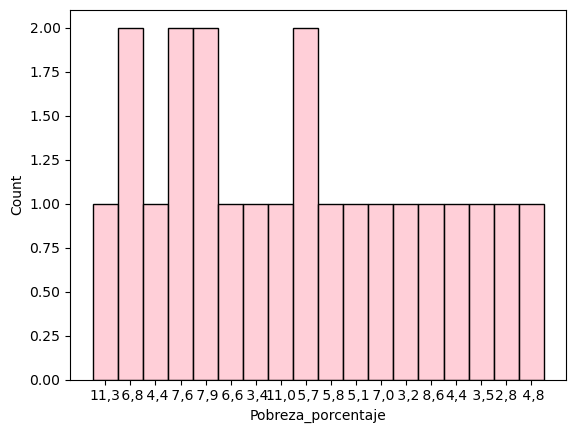

In [209]:
import seaborn as sea

sea.histplot(provinciasGDF2.Pobreza_porcentaje, color='pink')

In [210]:
# Probaremos hacer 6 intervalos
import mapclassify#esto no tien q ver con la data espacial ino cortes con la data numerica 
import numpy as np  #es uuna manera de decir equal interval

np.random.seed(12345) # so we all get the same results!
K=6
variable=provinciasGDF2['Pobreza_porcentaje']
ei6 = mapclassify.EqualInterval(variable, k=K)
msd = mapclassify.StdMean(variable)                             
q6=mapclassify.Quantiles(variable,k=K)
mb6 = mapclassify.MaximumBreaks(variable, k=K)
ht = mapclassify.HeadTailBreaks(variable)
fj6 = mapclassify.FisherJenks(variable, k=K)
jc6 = mapclassify.JenksCaspall(variable, k=K)
mp6 = mapclassify.MaxP(variable, k=K)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
clase6 = q6, ei6,msd, ht, mb6, fj6, jc6, mp6
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in clase6<])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['Classifier'] = [c.name for c in class5]
adcm.rename(columns={0:'ADCM'})
# see the value
adcms #este es para ver e error

### Exercise 7

<div class="alert-success">
        
Compute the neighbors of the capital of your country. Plot the results for each of the options. (calcula la distcnia rook queen y knn)
    
</div>

### Exercise 8

<div class="alert-success">
    
1. Compute the Moran's coefficient for **all** your numeric variables.
    
2. Make a scatter plot for each variable.
    
</div>